In [97]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [98]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
import io

Mounted at /content/gdrive


In [99]:
df = pd.read_csv('/content/gdrive/MyDrive/train_new.csv')

In [100]:
df.head()

,Deal_title,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Lead_revenue,Fund_category,Geography,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,Restaurants,320506.0,2.067264e+06,2020-03-29,Product_2,50 - 100 Million,Category 2,USA,TX,Executive Vice President,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",No,3,73.6
1,TitleKIW18,Construction Services,39488.0,2.408768e+05,2019-07-10,Product_2,500 Million - 1 Billion,Category 4,India,am,Chairman/CEO/President,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Hospitals/Clinics,359392.0,2.407926e+06,2019-07-27,Product_1,500 Million - 1 Billion,Category 4,USA,NY,SVP/General Counsel,Health service manager,Marketing Event,Level 1,NaN,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Real Estate,76774.0,4.683214e+05,2021-01-30,Product_2,500 Million - 1 Billion,Category 3,USA,WA,CEO/Co-Founder/Chairman,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Financial Services,483896.0,1.569884e+06,2019-05-22,Product_2,50 - 100 Million,Category 3,India,ga,Executive Vice President,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [101]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
lab_encod= LabelEncoder()

In [102]:
USA = pd.DataFrame()

In [103]:
df_USA=df[df["Geography"] == "USA"]
df_India=df[df["Geography"] == "India"]

In [104]:
# a=df_USA['Industry'].value_counts()
# print(a)
df_USA['Industry'].value_counts()

Banks                        741
Insurance                    207
Financial Services           195
Real Estate                  118
Investment Bank/Brokerage     94
                            ... 
Aircraft Parts                 1
Web                            1
BSPs (Broadband)               1
Hardware Consulting            1
Human Resources                1
Name: Industry, Length: 156, dtype: int64

In [105]:
df_USA=df_USA.drop(["Geography","Date_of_creation"], axis=1)
df_India=df_India.drop(["Geography","Date_of_creation"], axis=1)

In [106]:
df_USA=pd.get_dummies(df_USA
               ,columns = ['Industry','Pitch','Lead_revenue','Fund_category','Designation','Hiring_candidate_role','Lead_source','Level_of_meeting','Location','Internal_POC','Resource']
               ,drop_first = True
               )


In [107]:
df_USA["Last_lead_update"] = df_USA["Last_lead_update"].replace("?","Unknown")
df_USA=pd.get_dummies(df_USA
               ,columns = ['Last_lead_update']
               ,drop_first = True
               )

In [108]:
df_USA.head()

,Deal_title,Deal_value,Weighted_amount,Internal_rating,Success_probability,Industry_Aerospace/Defense,Industry_Aircraft Parts,Industry_Airlines/Air Couriers,Industry_Alternative,Industry_Apparel Products,Industry_Apparel Retail,Industry_Appliances/Tools,Industry_Architecture/Engineering,Industry_Associations,Industry_Auto Dealers,Industry_Auto Manufacturers,Industry_Auto Parts/Services,Industry_Automotive/Transportation,Industry_B2B eCommerce,Industry_BSPs (Broadband),Industry_Banks,Industry_Beverages (Alcoholic),Industry_Beverages (Non-Alcoholic),Industry_BioTech/Drugs,Industry_Biotech/Healthcare,Industry_Casinos/Gaming,Industry_Catalog/MailOrder,Industry_Chemical Manufacturing,Industry_Computer Hardware,Industry_Concrete/Cement,Industry_Conglomerates,Industry_Constr - Supplies,Industry_Constr/Agric Machinery,Industry_Construction Services,Industry_Construction/Agriculture,Industry_Consumer Products,Industry_Department/Discount,Industry_Education/Training,Industry_Electric Utilities,Industry_Electronics,Industry_Energy,Industry_Enterprise,Industry_Entertainment/Media,Industry_Fabricated Products,Industry_Finance,Industry_Finance Software,Industry_Financial Services,Industry_Food Processing,Industry_Furniture/Fixtures,Industry_Gold/Silver,Industry_Government,Industry_Grocery,Industry_Hardware Consulting,Industry_Health/Accident,Industry_Healthcare Facilities/Services,Industry_Home Improvement,Industry_Hospitals/Clinics,Industry_Hotels/Motels,Industry_Human Resources,Industry_ISPs,Industry_Industrial Equip,Industry_Information Services,Industry_Insurance,Industry_Internet Consulting,Industry_Internet Software,Industry_Investment Bank/Brokerage,Industry_Iron/Steel,Industry_Legal,Industry_Leisure/Hospitality,Industry_Lending/Mortgage,Industry_Life,Industry_MSPs (Mgmt),Industry_Machine Tools,Industry_Marketing/Advertising,Industry_Materials/Manufacturing,Industry_Medical Equipment,Industry_Metals/Mining,Industry_Movies,Industry_Multimedia Hardware,Industry_Multimedia Software,Industry_Music,Industry_Network Infrastructure,Industry_Networking/Comm.,Industry_Non-Profit,Industry_Office Equipment,Industry_Office Supplies,"Industry_Oil, Gas, Coal",Industry_Online Banking,Industry_Other,Industry_Other Biz Products,Industry_Other Biz Services,Industry_Other Consulting,Industry_Other Investment Firms,Industry_Other Vehicles,Industry_Outsourcing,Industry_Packaging/Containers,Industry_Periodicals,Industry_Peripherals/Comp.,Industry_Personal Services,Industry_Personal/Household Products,Industry_Photography,Industry_Plastic/Rubber,Industry_Plumbing/HVAC,Industry_Printing Services,Industry_Professional Services,Industry_Property/Casualty,Industry_Publishing,Industry_REIT,Industry_Radio,Industry_Real Estate,Industry_Recreational Products,Industry_Recreational Services,Industry_Rentals/Leasing,Industry_Restaurants,Industry_Retail,Industry_SaaS,Industry_Sales/Marketing Services,Industry_Satellite/RF/Micro,Industry_Schools,Industry_Scientific,Industry_Security Hardware,Industry_Security Software,Industry_Semiconductors,Industry_Servers/Storage,Industry_Service Providers,Industry_Services,Industry_Shipping,Industry_Social Services,Industry_Software,Industry_Software Consulting,Industry_Specialty,Industry_Staffing,Industry_Staffing/Outsourcing/HR,Industry_Supply Chain,Industry_Technology Consulting,Industry_Technology Retail,Industry_Telecom Consulting,Industry_Telecom Hardware,Industry_Telecom Services/Telephone Companies,Industry_Television/Cable,Industry_Testing,Industry_Training,Industry_Trucking,Industry_Trucks/Buses/RVs,Industry_Utilities,Industry_Venture Capital,Industry_Vitamins/Nutritionals/Other,Industry_WSPs (Wireless),Industry_Warehousing/Logistics,Industry_Waste/Recycling,Industry_Water Utilities,Industry_Web,Industry_Web Development,Industry_Wireless Hardware,Industry_Wireless Software Networking,Industry_Wood/Paper,Industry_Wood/Timber,Industry_eBusiness,Industry_eCommerce,Industry_eMail/Messaging,Pitch_Product_2,Lead_revenue_50 - 10

In [109]:
df_USA.shape

(3503, 935)

In [110]:
df_USA=df_USA. set_index ('Deal_title')

In [111]:
df_USA.head()

,Deal_value,Weighted_amount,Internal_rating,Success_probability,Industry_Aerospace/Defense,Industry_Aircraft Parts,Industry_Airlines/Air Couriers,Industry_Alternative,Industry_Apparel Products,Industry_Apparel Retail,Industry_Appliances/Tools,Industry_Architecture/Engineering,Industry_Associations,Industry_Auto Dealers,Industry_Auto Manufacturers,Industry_Auto Parts/Services,Industry_Automotive/Transportation,Industry_B2B eCommerce,Industry_BSPs (Broadband),Industry_Banks,Industry_Beverages (Alcoholic),Industry_Beverages (Non-Alcoholic),Industry_BioTech/Drugs,Industry_Biotech/Healthcare,Industry_Casinos/Gaming,Industry_Catalog/MailOrder,Industry_Chemical Manufacturing,Industry_Computer Hardware,Industry_Concrete/Cement,Industry_Conglomerates,Industry_Constr - Supplies,Industry_Constr/Agric Machinery,Industry_Construction Services,Industry_Construction/Agriculture,Industry_Consumer Products,Industry_Department/Discount,Industry_Education/Training,Industry_Electric Utilities,Industry_Electronics,Industry_Energy,Industry_Enterprise,Industry_Entertainment/Media,Industry_Fabricated Products,Industry_Finance,Industry_Finance Software,Industry_Financial Services,Industry_Food Processing,Industry_Furniture/Fixtures,Industry_Gold/Silver,Industry_Government,Industry_Grocery,Industry_Hardware Consulting,Industry_Health/Accident,Industry_Healthcare Facilities/Services,Industry_Home Improvement,Industry_Hospitals/Clinics,Industry_Hotels/Motels,Industry_Human Resources,Industry_ISPs,Industry_Industrial Equip,Industry_Information Services,Industry_Insurance,Industry_Internet Consulting,Industry_Internet Software,Industry_Investment Bank/Brokerage,Industry_Iron/Steel,Industry_Legal,Industry_Leisure/Hospitality,Industry_Lending/Mortgage,Industry_Life,Industry_MSPs (Mgmt),Industry_Machine Tools,Industry_Marketing/Advertising,Industry_Materials/Manufacturing,Industry_Medical Equipment,Industry_Metals/Mining,Industry_Movies,Industry_Multimedia Hardware,Industry_Multimedia Software,Industry_Music,Industry_Network Infrastructure,Industry_Networking/Comm.,Industry_Non-Profit,Industry_Office Equipment,Industry_Office Supplies,"Industry_Oil, Gas, Coal",Industry_Online Banking,Industry_Other,Industry_Other Biz Products,Industry_Other Biz Services,Industry_Other Consulting,Industry_Other Investment Firms,Industry_Other Vehicles,Industry_Outsourcing,Industry_Packaging/Containers,Industry_Periodicals,Industry_Peripherals/Comp.,Industry_Personal Services,Industry_Personal/Household Products,Industry_Photography,Industry_Plastic/Rubber,Industry_Plumbing/HVAC,Industry_Printing Services,Industry_Professional Services,Industry_Property/Casualty,Industry_Publishing,Industry_REIT,Industry_Radio,Industry_Real Estate,Industry_Recreational Products,Industry_Recreational Services,Industry_Rentals/Leasing,Industry_Restaurants,Industry_Retail,Industry_SaaS,Industry_Sales/Marketing Services,Industry_Satellite/RF/Micro,Industry_Schools,Industry_Scientific,Industry_Security Hardware,Industry_Security Software,Industry_Semiconductors,Industry_Servers/Storage,Industry_Service Providers,Industry_Services,Industry_Shipping,Industry_Social Services,Industry_Software,Industry_Software Consulting,Industry_Specialty,Industry_Staffing,Industry_Staffing/Outsourcing/HR,Industry_Supply Chain,Industry_Technology Consulting,Industry_Technology Retail,Industry_Telecom Consulting,Industry_Telecom Hardware,Industry_Telecom Services/Telephone Companies,Industry_Television/Cable,Industry_Testing,Industry_Training,Industry_Trucking,Industry_Trucks/Buses/RVs,Industry_Utilities,Industry_Venture Capital,Industry_Vitamins/Nutritionals/Other,Industry_WSPs (Wireless),Industry_Warehousing/Logistics,Industry_Waste/Recycling,Industry_Water Utilities,Industry_Web,Industry_Web Development,Industry_Wireless Hardware,Industry_Wireless Software Networking,Industry_Wood/Paper,Industry_Wood/Timber,Industry_eBusiness,Industry_eCommerce,Industry_eMail/Messaging,Pitch_Product_2,Lead_revenue_50 - 100 Million,L

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

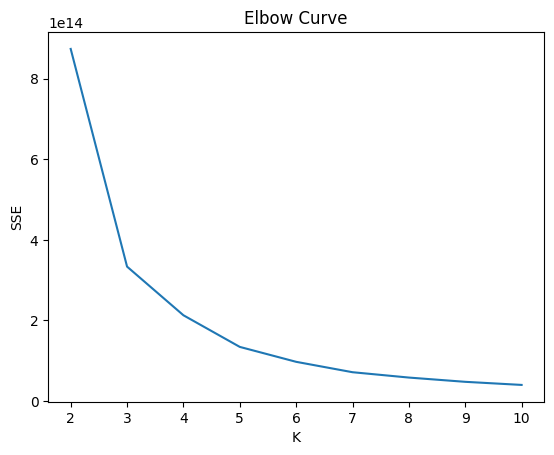

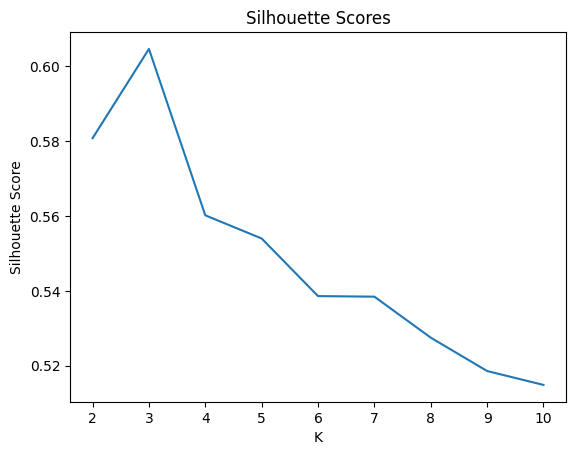

Best K value using elbow method: 3
Best K value using silhouette index: 3
Final best K value: 3


In [112]:
SSE = []
silhouette_scores = []

# try K values from 2 to 10
for k in range(2, 11):
    # initialize the KMeans algorithm
    kmeans = KMeans(n_clusters=k, random_state=42)
    # fit the algorithm on the data
    kmeans.fit(df_USA)
    # add the SSE to the list
    SSE.append(kmeans.inertia_)
    # calculate the silhouette score and add it to the list
    silhouette_scores.append(silhouette_score(df_USA, kmeans.labels_))

# plot the elbow curve
plt.plot(range(2, 11), SSE)
plt.title('Elbow Curve')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

# plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()
# choose the best K value using the elbow method
best_K_elbow = 3  # the elbow point is at K=3

# choose the best K value using the silhouette index
best_K_silhouette = np.argmax(silhouette_scores) + 2  # add 2 because K range started from 2

# print the best K values from both methods
print("Best K value using elbow method:", best_K_elbow)
print("Best K value using silhouette index:", best_K_silhouette)

# if the best K values are different, choose the one with higher silhouette score
if best_K_elbow != best_K_silhouette:
    if silhouette_scores[best_K_silhouette - 2] > silhouette_scores[best_K_elbow - 2]:
        best_K = best_K_silhouette
    else:
        best_K = best_K_elbow
else:
    best_K = best_K_elbow

# print the final best K value
print("Final best K value:", best_K)

In [113]:
kmeans1=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans1=kmeans1.fit_predict(df_USA)
y_kmeans1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 0, ..., 1, 0, 1], dtype=int32)

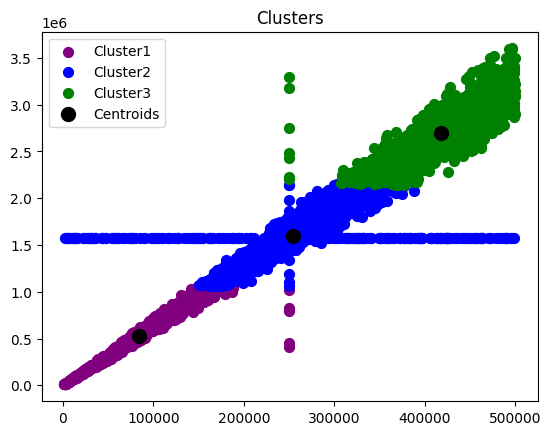

In [114]:
X = np.array(df_USA)
plt.scatter(X[y_kmeans1==0,0],X[y_kmeans1==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_kmeans1==1,0],X[y_kmeans1==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_kmeans1==2,0],X[y_kmeans1==2,1],s=50, c='green',label='Cluster3')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

In [115]:
df_USA.head()

,Deal_value,Weighted_amount,Internal_rating,Success_probability,Industry_Aerospace/Defense,Industry_Aircraft Parts,Industry_Airlines/Air Couriers,Industry_Alternative,Industry_Apparel Products,Industry_Apparel Retail,Industry_Appliances/Tools,Industry_Architecture/Engineering,Industry_Associations,Industry_Auto Dealers,Industry_Auto Manufacturers,Industry_Auto Parts/Services,Industry_Automotive/Transportation,Industry_B2B eCommerce,Industry_BSPs (Broadband),Industry_Banks,Industry_Beverages (Alcoholic),Industry_Beverages (Non-Alcoholic),Industry_BioTech/Drugs,Industry_Biotech/Healthcare,Industry_Casinos/Gaming,Industry_Catalog/MailOrder,Industry_Chemical Manufacturing,Industry_Computer Hardware,Industry_Concrete/Cement,Industry_Conglomerates,Industry_Constr - Supplies,Industry_Constr/Agric Machinery,Industry_Construction Services,Industry_Construction/Agriculture,Industry_Consumer Products,Industry_Department/Discount,Industry_Education/Training,Industry_Electric Utilities,Industry_Electronics,Industry_Energy,Industry_Enterprise,Industry_Entertainment/Media,Industry_Fabricated Products,Industry_Finance,Industry_Finance Software,Industry_Financial Services,Industry_Food Processing,Industry_Furniture/Fixtures,Industry_Gold/Silver,Industry_Government,Industry_Grocery,Industry_Hardware Consulting,Industry_Health/Accident,Industry_Healthcare Facilities/Services,Industry_Home Improvement,Industry_Hospitals/Clinics,Industry_Hotels/Motels,Industry_Human Resources,Industry_ISPs,Industry_Industrial Equip,Industry_Information Services,Industry_Insurance,Industry_Internet Consulting,Industry_Internet Software,Industry_Investment Bank/Brokerage,Industry_Iron/Steel,Industry_Legal,Industry_Leisure/Hospitality,Industry_Lending/Mortgage,Industry_Life,Industry_MSPs (Mgmt),Industry_Machine Tools,Industry_Marketing/Advertising,Industry_Materials/Manufacturing,Industry_Medical Equipment,Industry_Metals/Mining,Industry_Movies,Industry_Multimedia Hardware,Industry_Multimedia Software,Industry_Music,Industry_Network Infrastructure,Industry_Networking/Comm.,Industry_Non-Profit,Industry_Office Equipment,Industry_Office Supplies,"Industry_Oil, Gas, Coal",Industry_Online Banking,Industry_Other,Industry_Other Biz Products,Industry_Other Biz Services,Industry_Other Consulting,Industry_Other Investment Firms,Industry_Other Vehicles,Industry_Outsourcing,Industry_Packaging/Containers,Industry_Periodicals,Industry_Peripherals/Comp.,Industry_Personal Services,Industry_Personal/Household Products,Industry_Photography,Industry_Plastic/Rubber,Industry_Plumbing/HVAC,Industry_Printing Services,Industry_Professional Services,Industry_Property/Casualty,Industry_Publishing,Industry_REIT,Industry_Radio,Industry_Real Estate,Industry_Recreational Products,Industry_Recreational Services,Industry_Rentals/Leasing,Industry_Restaurants,Industry_Retail,Industry_SaaS,Industry_Sales/Marketing Services,Industry_Satellite/RF/Micro,Industry_Schools,Industry_Scientific,Industry_Security Hardware,Industry_Security Software,Industry_Semiconductors,Industry_Servers/Storage,Industry_Service Providers,Industry_Services,Industry_Shipping,Industry_Social Services,Industry_Software,Industry_Software Consulting,Industry_Specialty,Industry_Staffing,Industry_Staffing/Outsourcing/HR,Industry_Supply Chain,Industry_Technology Consulting,Industry_Technology Retail,Industry_Telecom Consulting,Industry_Telecom Hardware,Industry_Telecom Services/Telephone Companies,Industry_Television/Cable,Industry_Testing,Industry_Training,Industry_Trucking,Industry_Trucks/Buses/RVs,Industry_Utilities,Industry_Venture Capital,Industry_Vitamins/Nutritionals/Other,Industry_WSPs (Wireless),Industry_Warehousing/Logistics,Industry_Waste/Recycling,Industry_Water Utilities,Industry_Web,Industry_Web Development,Industry_Wireless Hardware,Industry_Wireless Software Networking,Industry_Wood/Paper,Industry_Wood/Timber,Industry_eBusiness,Industry_eCommerce,Industry_eMail/Messaging,Pitch_Product_2,Lead_revenue_50 - 100 Million,L

In [116]:
df_clusters = {}
for cluster_id in range(3):
    df_clusters[cluster_id] = df_USA[y_kmeans1 == cluster_id]

In [117]:
num_datapoints_in_cluster = {}
for cluster_id in range(3):
    num_datapoints_in_cluster[cluster_id] = len(df_USA[y_kmeans1 == cluster_id])
for cluster_id, num_datapoints in num_datapoints_in_cluster.items():
    print(f"Cluster {cluster_id}: {num_datapoints}")

Cluster 0: 1058
Cluster 1: 1384
Cluster 2: 1061


In [118]:
for cluster_id, df in df_clusters.items():
    df.to_csv(f"/content/gdrive/MyDrive/USA_{cluster_id}.csv")

For India now

In [119]:
df_India=pd.get_dummies(df_India
               ,columns = ['Industry','Pitch','Lead_revenue','Fund_category','Designation','Hiring_candidate_role','Lead_source','Level_of_meeting','Location','Internal_POC','Resource']
               ,drop_first = True
               )

In [120]:
df_India["Last_lead_update"] = df_India["Last_lead_update"].replace("?","Unknown")
df_India=pd.get_dummies(df_India
               ,columns = ['Last_lead_update']
               ,drop_first = True
               )

In [121]:
df_India.head()

,Deal_title,Deal_value,Weighted_amount,Internal_rating,Success_probability,Industry_Advertising/PR,Industry_Aerospace/Defense,Industry_Aircraft Parts,Industry_Airlines/Air Couriers,Industry_Alternative,Industry_Apparel Products,Industry_Apparel Retail,Industry_Architecture/Engineering,Industry_Associations,Industry_Auto Manufacturers,Industry_Auto Parts/Services,Industry_Automotive/Transportation,Industry_B2B eCommerce,Industry_Banks,Industry_Beverages (Alcoholic),Industry_Beverages (Non-Alcoholic),Industry_BioTech/Drugs,Industry_Biotech/Healthcare,Industry_Book,Industry_Casinos/Gaming,Industry_Catalog/MailOrder,Industry_Chemical Manufacturing,Industry_Computer Hardware,Industry_Concrete/Cement,Industry_Conglomerates,Industry_Constr - Supplies,Industry_Constr/Agric Machinery,Industry_Construction Services,Industry_Construction/Agriculture,Industry_Consumer Products,Industry_Database,Industry_Department/Discount,Industry_ERP,Industry_Education/Training,Industry_Electric Utilities,Industry_Electronics,Industry_Energy,Industry_Entertainment/Media,Industry_Fabricated Products,Industry_Finance,Industry_Finance Software,Industry_Financial Services,Industry_Food Processing,Industry_Furniture/Fixtures,Industry_Gold/Silver,Industry_Government,Industry_Grocery,Industry_Health/Accident,Industry_Healthcare Facilities/Services,Industry_Home Improvement,Industry_Hospitals/Clinics,Industry_Hotels/Motels,Industry_Human Resources,Industry_ISPs,Industry_Industrial Equip,Industry_Information Services,Industry_Insurance,Industry_Internet,Industry_Internet Consulting,Industry_Internet Software,Industry_Investment Bank/Brokerage,Industry_Iron/Steel,Industry_Legal,Industry_Leisure/Hospitality,Industry_Lending/Mortgage,Industry_Life,Industry_MSPs (Mgmt),Industry_Machine Tools,Industry_Marketing/Advertising,Industry_Materials/Manufacturing,Industry_Medical Equipment,Industry_Metals/Mining,Industry_Movies,Industry_Multimedia Software,Industry_Music,Industry_Natural Gas,Industry_Network Infrastructure,Industry_Networking/Comm.,Industry_Newspapers,Industry_Non-Profit,Industry_OSPs (Optical),Industry_Office Equipment,Industry_Office Supplies,"Industry_Oil, Gas, Coal",Industry_Online Banking,Industry_Other,Industry_Other Biz Services,Industry_Other Consulting,Industry_Other Investment Firms,Industry_Other Vehicles,Industry_Outsourcing,Industry_Packaging/Containers,Industry_Periodicals,Industry_Peripherals/Comp.,Industry_Personal Services,Industry_Personal/Household Products,Industry_Photography,Industry_Plastic/Rubber,Industry_Plumbing/HVAC,Industry_Printing Services,Industry_Professional Services,Industry_Property/Casualty,Industry_Publishing,Industry_REIT,Industry_Railroads,Industry_Real Estate,Industry_Recreational Products,Industry_Recreational Services,Industry_Religious Groups,Industry_Rentals/Leasing,Industry_Restaurants,Industry_Retail,Industry_SaaS,Industry_Sales/Marketing Services,Industry_Sales/Marketing Software,Industry_Schools,Industry_Scientific,Industry_Security Hardware,Industry_Security Services,Industry_Security Software,Industry_Semiconductors,Industry_Servers/Storage,Industry_Service Providers,Industry_Services,Industry_Shipping,Industry_Social Services,Industry_Software,Industry_Software Consulting,Industry_Specialty,Industry_Speech Recognition,Industry_Staffing,Industry_Staffing/Outsourcing/HR,Industry_Supply Chain,Industry_Technology Consulting,Industry_Technology Retail,Industry_Telecom Consulting,Industry_Telecom Hardware,Industry_Telecom Services/Telephone Companies,Industry_Telecom Software,Industry_Television/Cable,Industry_Testing,Industry_Training,Industry_Trucking,Industry_Trucks/Buses/RVs,Industry_Utilities,Industry_Venture Capital,Industry_Vitamins/Nutritionals/Other,Industry_WSPs (Wireless),Industry_Warehousing/Logistics,Industry_Waste/Recycling,Industry_Water Utilities,Industry_Wireless Consulting,Industry_Wireless Hardware,Industry_Wood/Paper,Industry_Wood/Timber,Industry_eBusiness,Industry_eCommerce,Pitch_Product_2,Lea

In [122]:
df_India=df_India. set_index ('Deal_title')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

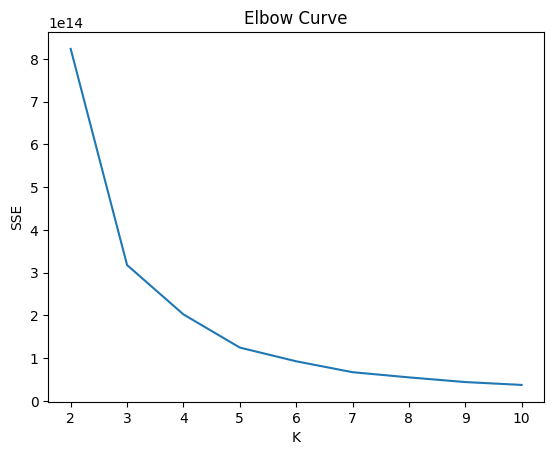

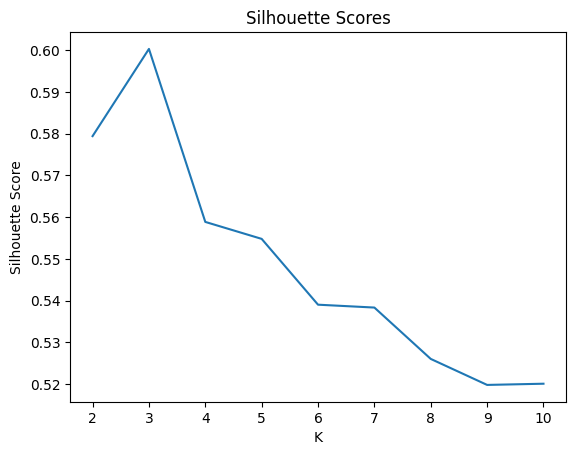

Best K value using elbow method: 3
Best K value using silhouette index: 3
Final best K value: 3


In [123]:
SSE = []
silhouette_scores = []

# try K values from 2 to 10
for k in range(2, 11):
    # initialize the KMeans algorithm
    kmeans = KMeans(n_clusters=k, random_state=42)
    # fit the algorithm on the data
    kmeans.fit(df_India)
    # add the SSE to the list
    SSE.append(kmeans.inertia_)
    # calculate the silhouette score and add it to the list
    silhouette_scores.append(silhouette_score(df_India, kmeans.labels_))

# plot the elbow curve
plt.plot(range(2, 11), SSE)
plt.title('Elbow Curve')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

# plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()
# choose the best K value using the elbow method
best_K_elbow = 3  # the elbow point is at K=3

# choose the best K value using the silhouette index
best_K_silhouette = np.argmax(silhouette_scores) + 2  # add 2 because K range started from 2

# print the best K values from both methods
print("Best K value using elbow method:", best_K_elbow)
print("Best K value using silhouette index:", best_K_silhouette)

# if the best K values are different, choose the one with higher silhouette score
if best_K_elbow != best_K_silhouette:
    if silhouette_scores[best_K_silhouette - 2] > silhouette_scores[best_K_elbow - 2]:
        best_K = best_K_silhouette
    else:
        best_K = best_K_elbow
else:
    best_K = best_K_elbow

# print the final best K value
print("Final best K value:", best_K)

In [124]:
kmeans2=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans2=kmeans2.fit_predict(df_India)
y_kmeans2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 0, ..., 0, 2, 2], dtype=int32)

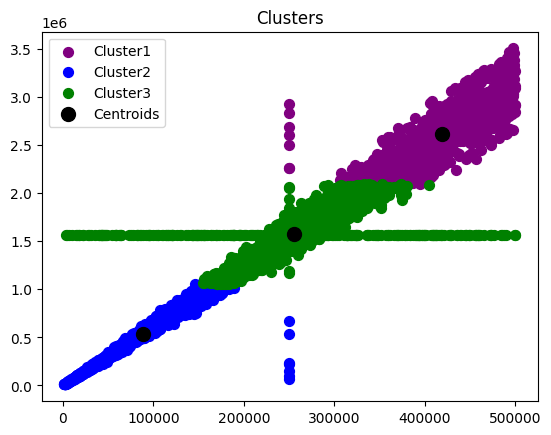

In [125]:
X2 = np.array(df_India)
plt.scatter(X2[y_kmeans2==0,0],X2[y_kmeans2==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X2[y_kmeans2==1,0],X2[y_kmeans2==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X2[y_kmeans2==2,0],X2[y_kmeans2==2,1],s=50, c='green',label='Cluster3')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

In [126]:
df_India.head()

,Deal_value,Weighted_amount,Internal_rating,Success_probability,Industry_Advertising/PR,Industry_Aerospace/Defense,Industry_Aircraft Parts,Industry_Airlines/Air Couriers,Industry_Alternative,Industry_Apparel Products,Industry_Apparel Retail,Industry_Architecture/Engineering,Industry_Associations,Industry_Auto Manufacturers,Industry_Auto Parts/Services,Industry_Automotive/Transportation,Industry_B2B eCommerce,Industry_Banks,Industry_Beverages (Alcoholic),Industry_Beverages (Non-Alcoholic),Industry_BioTech/Drugs,Industry_Biotech/Healthcare,Industry_Book,Industry_Casinos/Gaming,Industry_Catalog/MailOrder,Industry_Chemical Manufacturing,Industry_Computer Hardware,Industry_Concrete/Cement,Industry_Conglomerates,Industry_Constr - Supplies,Industry_Constr/Agric Machinery,Industry_Construction Services,Industry_Construction/Agriculture,Industry_Consumer Products,Industry_Database,Industry_Department/Discount,Industry_ERP,Industry_Education/Training,Industry_Electric Utilities,Industry_Electronics,Industry_Energy,Industry_Entertainment/Media,Industry_Fabricated Products,Industry_Finance,Industry_Finance Software,Industry_Financial Services,Industry_Food Processing,Industry_Furniture/Fixtures,Industry_Gold/Silver,Industry_Government,Industry_Grocery,Industry_Health/Accident,Industry_Healthcare Facilities/Services,Industry_Home Improvement,Industry_Hospitals/Clinics,Industry_Hotels/Motels,Industry_Human Resources,Industry_ISPs,Industry_Industrial Equip,Industry_Information Services,Industry_Insurance,Industry_Internet,Industry_Internet Consulting,Industry_Internet Software,Industry_Investment Bank/Brokerage,Industry_Iron/Steel,Industry_Legal,Industry_Leisure/Hospitality,Industry_Lending/Mortgage,Industry_Life,Industry_MSPs (Mgmt),Industry_Machine Tools,Industry_Marketing/Advertising,Industry_Materials/Manufacturing,Industry_Medical Equipment,Industry_Metals/Mining,Industry_Movies,Industry_Multimedia Software,Industry_Music,Industry_Natural Gas,Industry_Network Infrastructure,Industry_Networking/Comm.,Industry_Newspapers,Industry_Non-Profit,Industry_OSPs (Optical),Industry_Office Equipment,Industry_Office Supplies,"Industry_Oil, Gas, Coal",Industry_Online Banking,Industry_Other,Industry_Other Biz Services,Industry_Other Consulting,Industry_Other Investment Firms,Industry_Other Vehicles,Industry_Outsourcing,Industry_Packaging/Containers,Industry_Periodicals,Industry_Peripherals/Comp.,Industry_Personal Services,Industry_Personal/Household Products,Industry_Photography,Industry_Plastic/Rubber,Industry_Plumbing/HVAC,Industry_Printing Services,Industry_Professional Services,Industry_Property/Casualty,Industry_Publishing,Industry_REIT,Industry_Railroads,Industry_Real Estate,Industry_Recreational Products,Industry_Recreational Services,Industry_Religious Groups,Industry_Rentals/Leasing,Industry_Restaurants,Industry_Retail,Industry_SaaS,Industry_Sales/Marketing Services,Industry_Sales/Marketing Software,Industry_Schools,Industry_Scientific,Industry_Security Hardware,Industry_Security Services,Industry_Security Software,Industry_Semiconductors,Industry_Servers/Storage,Industry_Service Providers,Industry_Services,Industry_Shipping,Industry_Social Services,Industry_Software,Industry_Software Consulting,Industry_Specialty,Industry_Speech Recognition,Industry_Staffing,Industry_Staffing/Outsourcing/HR,Industry_Supply Chain,Industry_Technology Consulting,Industry_Technology Retail,Industry_Telecom Consulting,Industry_Telecom Hardware,Industry_Telecom Services/Telephone Companies,Industry_Telecom Software,Industry_Television/Cable,Industry_Testing,Industry_Training,Industry_Trucking,Industry_Trucks/Buses/RVs,Industry_Utilities,Industry_Venture Capital,Industry_Vitamins/Nutritionals/Other,Industry_WSPs (Wireless),Industry_Warehousing/Logistics,Industry_Waste/Recycling,Industry_Water Utilities,Industry_Wireless Consulting,Industry_Wireless Hardware,Industry_Wood/Paper,Industry_Wood/Timber,Industry_eBusiness,Industry_eCommerce,Pitch_Product_2,Lead_revenue_5

In [127]:
df_clusters2 = {}
for cluster_id in range(3):
    df_clusters2[cluster_id] = df_India[y_kmeans2 == cluster_id]

In [128]:
num_datapoints_in_cluster2 = {}
for cluster_id in range(3):
    num_datapoints_in_cluster2[cluster_id] = len(df_India[y_kmeans2 == cluster_id])
for cluster_id, num_datapoints in num_datapoints_in_cluster2.items():
    print(f"Cluster {cluster_id}: {num_datapoints}")

Cluster 0: 1010
Cluster 1: 1162
Cluster 2: 1332


In [129]:
for cluster_id, df in df_clusters2.items():
    df.to_csv(f"/content/gdrive/MyDrive/India_{cluster_id}.csv")